<a href="https://colab.research.google.com/github/IamHarshitRajpal/MultiThreading/blob/main/Harshit_102103683.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTITHREADING

Multiplying  100 random matrices of size 1k x 1k  with a constant matrix(1k x1k) using multithreading

+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
| Threads=1 | Threads=2 | Threads=3 | Threads=4 | Threads=5 | Threads=6 | Threads=7 | Threads=8 | Threads=9 | Threads=10 |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
| 9.0633    | 7.6952    | 7.9078    | 8.2838    | 6.7677    | 8.453     | 6.6015    | 8.3942    | 6.6912    | 12.444     |
+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+


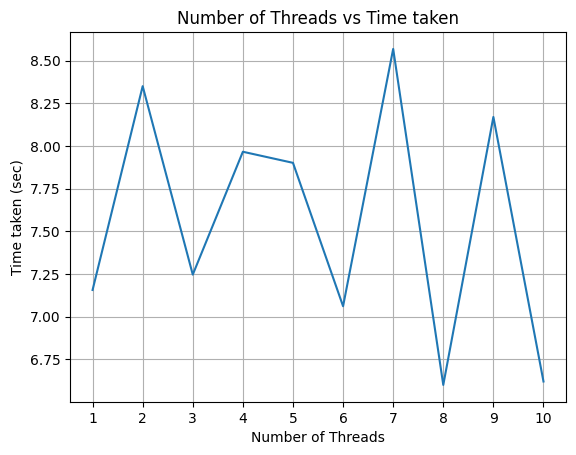

In [2]:
import ipywidgets as widgets
from IPython.display import display
import random
import threading
import time
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

class RandomNumberDashboard:
    def __init__(self):
        self.label = widgets.Label(value="Random Number: ")
        self.refresh_rate = 1
        self.running = False


        self.btn_slow = widgets.Button(description="Slow")
        self.btn_medium = widgets.Button(description="Medium")
        self.btn_fast = widgets.Button(description="Fast")

        self.btn_slow.on_click(lambda _: self.change_refresh_rate(3))
        self.btn_medium.on_click(lambda _: self.change_refresh_rate(2))
        self.btn_fast.on_click(lambda _: self.change_refresh_rate(1))


        self.start_button = widgets.Button(description="Start")
        self.stop_button = widgets.Button(description="Stop")


        self.start_button.on_click(lambda _: self.start_dashboard())
        self.stop_button.on_click(lambda _: self.stop_dashboard())


        display(self.label)
        display(widgets.HBox([self.btn_slow, self.btn_medium, self.btn_fast]))
        display(widgets.HBox([self.start_button, self.stop_button]))

    def start_dashboard(self):
        self.running = True
        self.update_random_number()

    def stop_dashboard(self):
        self.running = False

    def update_random_number(self):
        while self.running:
            random_number = random.randint(0, 100)
            self.label.value = f"Random Number: {random_number}"
            time.sleep(self.refresh_rate)

    def change_refresh_rate(self, rate):
        self.refresh_rate = rate

def matrix_multiply(A, B, result, index):
    result[index] = np.dot(A, B)

def run_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(random_matrices):
        thread = threading.Thread(target=matrix_multiply, args=(input_matrix, matrix, results, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

input_matrix = np.random.rand(1000, 1000)
results = [None] * 100
random_matrices = [np.random.rand(1000, 1000) for _ in range(100)]

def display_results_table():
    results_table = []
    num_threads = list(range(1, 11))
    time_taken = []
    for num_t in num_threads:
        ttime = run_with_threads(num_t)
        time_taken.append(ttime)
        results_table.append(("Threads=" + str(num_t), round(ttime, 4)))
    table_data, table_headers = list(zip(*results_table))
    print(tabulate([table_data, table_headers], tablefmt="grid"))

def plot_graph():
    plt.plot(list(range(1, 11)), time_taken)
    plt.xlabel('Number of Threads')
    plt.ylabel('Time taken (sec)')
    plt.title('Number of Threads vs Time taken')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    display_results_table()
    plot_graph()
